In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps

from minisom import MiniSom

In [2]:
data = pd.read_table('shuttle.tst', sep=' ', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [3]:
X = data.iloc[:,:-1].values

y = data.iloc[:,9:10].values

In [4]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.1

In [5]:
# define SOM:

som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=9, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights

som.random_weights_init(X)

# Training

som.train_random(X, iterations)

In [6]:
# Weights are:
wts = som.weights
# Shape of the weight are:
wts.shape
# Returns the distance map from the weights:
som.distance_map()

AttributeError: 'MiniSom' object has no attribute 'weights'

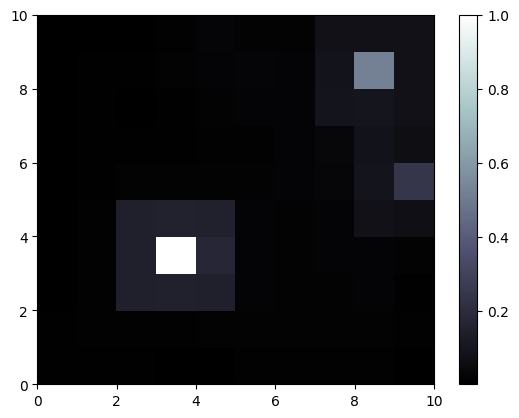

In [6]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()

In [7]:
som.winner(X)

ValueError: operands could not be broadcast together with shapes (14500,9) (10,10,9) 

TypeError: only integer scalar arrays can be converted to a scalar index

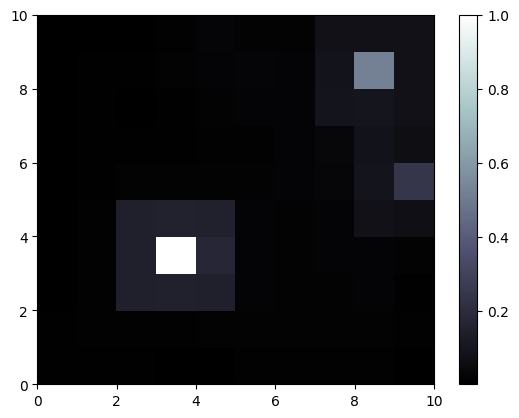

In [8]:
bone()

pcolor(som.distance_map().T)

colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square

colors = ['r', 'g']

for i, x in enumerate(X):

    w = som.winner(x)

    plot(w[0] + 0.5,

         w[1] + 0.5,

         markers[y[i]],

         markeredgecolor = colors[y[i]],

         markerfacecolor = 'None',

         markersize = 10,

         markeredgewidth = 2)

show()

In [11]:
mappings = som.win_map(x)

mappings

mappings.keys()

len(mappings.keys())

mappings[(9,8)]


TypeError: object of type 'numpy.int64' has no len()